In [138]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [179]:
x = np.linspace(-1, 1, 100)
f = np.exp(x) + np.sin(5*x)

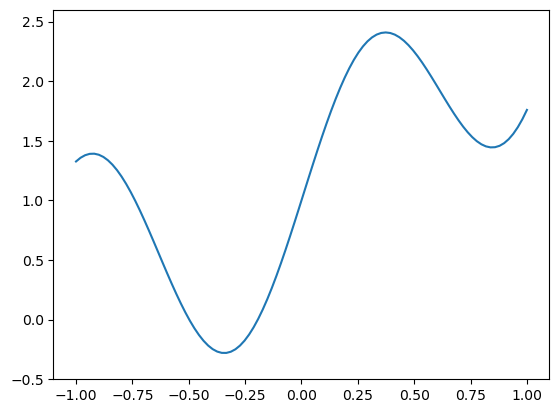

In [ ]:
plt.Figure()
plt.plot(x, f)
plt.xlim([-1.1, 1.1])
plt.ylim([-0.5, 2.6])
plt.show()

# Planteamiento de entradas y salidas

In [181]:
# Convertir datos a tensores
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
f_tensor = torch.tensor(f, dtype=torch.float32).unsqueeze(1)

# Una neurona

Epoch [100/1000], Loss: 0.2348
Epoch [200/1000], Loss: 0.2348
Epoch [300/1000], Loss: 0.2348
Epoch [400/1000], Loss: 0.2348
Epoch [500/1000], Loss: 0.2348
Epoch [600/1000], Loss: 0.2348
Epoch [700/1000], Loss: 0.2348
Epoch [800/1000], Loss: 0.2348
Epoch [900/1000], Loss: 0.2348
Epoch [1000/1000], Loss: 0.2348


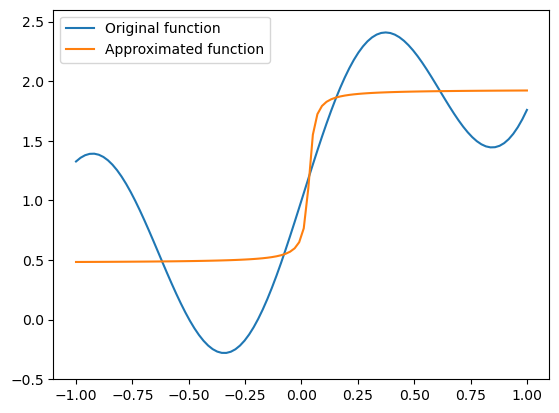

Ecuación explícita: f(x) = 0.4630 * atan(57.3259 * x + -1.9612) + 1.2033


In [ ]:
# Convertir datos a tensores
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
f_tensor = torch.tensor(f, dtype=torch.float32).unsqueeze(1)

# Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 1)  # Capa con 2 nodos
        self.fc2 = nn.Linear(1, 1)  # Capa de salida

    def forward(self, x):
        x = torch.atan(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=0.01)

# Función de cierre para el optimizador L-BFGS
def closure():
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, f_tensor)
    loss.backward()
    return loss

# Entrenar el modelo
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.step(closure)

    if (epoch+1) % 100 == 0:
        loss = closure().item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

# Extraer los pesos y sesgos del modelo
fc1_weights = model.fc1.weight.data.numpy()
fc1_biases = model.fc1.bias.data.numpy()
fc2_weights = model.fc2.weight.data.numpy()[0]
fc2_bias = model.fc2.bias.data.numpy()[0]

# Definir la ecuación explícita
def approximated_function(x):
    hidden_layer_output = np.arctan(fc1_weights @ x + fc1_biases)
    return fc2_weights @ hidden_layer_output + fc2_bias

# Evaluar la función aproximada
x_vals = np.linspace(-1, 1, 100)
approximated_vals = np.array([approximated_function(np.array([xi])) for xi in x_vals])

# Graficar los resultados
plt.plot(x, f, label='Original function')
plt.plot(x_vals, approximated_vals, label='Approximated function')
plt.xlim([-1.1, 1.1])
plt.ylim([-0.5, 2.6])
plt.legend()
plt.show()

# Imprimir la ecuación explícita
equation = "f(x) = "
for i in range(1):
    equation += f"{fc2_weights[i]:.4f} * atan({fc1_weights[i, 0]:.4f} * x + {fc1_biases[i]:.4f}) + "
equation += f"{fc2_bias:.4f}"
print("Ecuación explícita:", equation)

# Dos neuronas

Epoch [100/1000], Loss: 0.0129
Epoch [200/1000], Loss: 0.0129
Epoch [300/1000], Loss: 0.0129
Epoch [400/1000], Loss: 0.0129
Epoch [500/1000], Loss: 0.0129
Epoch [600/1000], Loss: 0.0129
Epoch [700/1000], Loss: 0.0129
Epoch [800/1000], Loss: 0.0129
Epoch [900/1000], Loss: 0.0129
Epoch [1000/1000], Loss: 0.0129


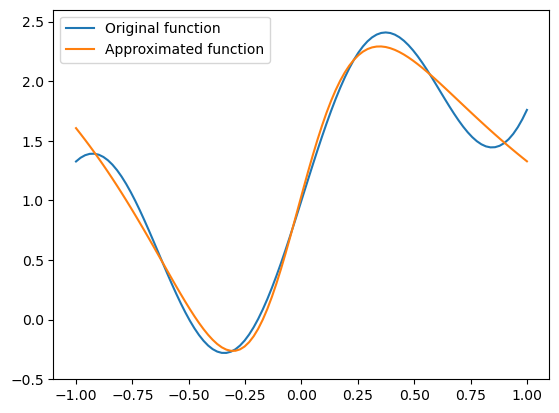

Ecuación explícita: f(x) = 39.5405 * atan(2.2982 * x + 0.1134) + 41.3316 * atan(-2.0346 * x + -0.1264) + 1.7708


In [203]:
# Convertir datos a tensores
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
f_tensor = torch.tensor(f, dtype=torch.float32).unsqueeze(1)

# Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 2)  # Capa con 2 nodos
        self.fc2 = nn.Linear(2, 1)  # Capa de salida

    def forward(self, x):
        x = torch.atan(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=0.01)

# Función de cierre para el optimizador L-BFGS
def closure():
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, f_tensor)
    loss.backward()
    return loss

# Entrenar el modelo
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.step(closure)

    if (epoch+1) % 100 == 0:
        loss = closure().item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

# Extraer los pesos y sesgos del modelo
fc1_weights = model.fc1.weight.data.numpy()
fc1_biases = model.fc1.bias.data.numpy()
fc2_weights = model.fc2.weight.data.numpy()[0]
fc2_bias = model.fc2.bias.data.numpy()[0]

# Definir la ecuación explícita
def approximated_function(x):
    hidden_layer_output = np.arctan(fc1_weights @ x + fc1_biases)
    return fc2_weights @ hidden_layer_output + fc2_bias

# Evaluar la función aproximada
x_vals = np.linspace(-1, 1, 100)
approximated_vals = np.array([approximated_function(np.array([xi])) for xi in x_vals])

# Graficar los resultados
plt.plot(x, f, label='Original function')
plt.plot(x_vals, approximated_vals, label='Approximated function')
plt.xlim([-1.1, 1.1])
plt.ylim([-0.5, 2.6])
plt.legend()
plt.show()

# Imprimir la ecuación explícita
equation = "f(x) = "
for i in range(2):
    equation += f"{fc2_weights[i]:.4f} * atan({fc1_weights[i, 0]:.4f} * x + {fc1_biases[i]:.4f}) + "
equation += f"{fc2_bias:.4f}"
print("Ecuación explícita:", equation)

# Tres neuronas

Epoch [100/1000], Loss: 0.0060
Epoch [200/1000], Loss: 0.0017
Epoch [300/1000], Loss: 0.0017
Epoch [400/1000], Loss: 0.0017
Epoch [500/1000], Loss: 0.0017
Epoch [600/1000], Loss: 0.0017
Epoch [700/1000], Loss: 0.0017
Epoch [800/1000], Loss: 0.0017
Epoch [900/1000], Loss: 0.0017
Epoch [1000/1000], Loss: 0.0017


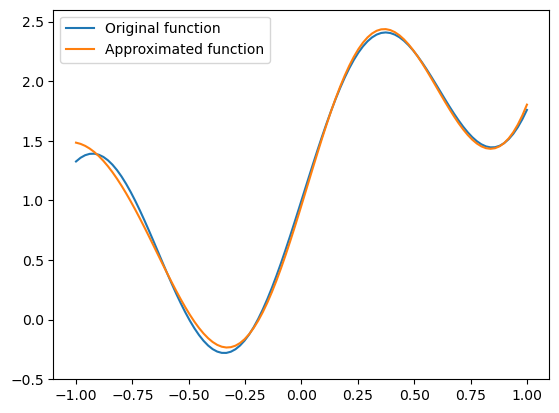

Ecuación explícita: f(x) = -244.9229 * atan(-0.4151 * x + 0.2063) + -444.7161 * atan(-1.0822 * x + 0.0822) + 610.0167 * atan(-0.9411 * x + 0.0909) + 31.9190


In [204]:
# Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 3)  # Capa con 3 nodos
        self.fc2 = nn.Linear(3, 1)  # Capa de salida

    def forward(self, x):
        x = torch.atan(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=0.01)

# Función de cierre para el optimizador L-BFGS
def closure():
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, f_tensor)
    loss.backward()
    return loss

# Entrenar el modelo
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.step(closure)

    if (epoch+1) % 100 == 0:
        loss = closure().item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

# Extraer los pesos y sesgos del modelo
fc1_weights = model.fc1.weight.data.numpy()
fc1_biases = model.fc1.bias.data.numpy()
fc2_weights = model.fc2.weight.data.numpy()[0]
fc2_bias = model.fc2.bias.data.numpy()[0]

# Definir la ecuación explícita
def approximated_function(x):
    hidden_layer_output = np.arctan(fc1_weights @ x + fc1_biases)
    return fc2_weights @ hidden_layer_output + fc2_bias

# Evaluar la función aproximada
x_vals = np.linspace(-1, 1, 100)
approximated_vals = np.array([approximated_function(np.array([xi])) for xi in x_vals])

# Graficar los resultados
plt.plot(x, f, label='Original function')
plt.plot(x_vals, approximated_vals, label='Approximated function')
plt.xlim([-1.1, 1.1])
plt.ylim([-0.5, 2.6])
plt.legend()
plt.show()

# Imprimir la ecuación explícita
equation = "f(x) = "
for i in range(3):
    equation += f"{fc2_weights[i]:.4f} * atan({fc1_weights[i, 0]:.4f} * x + {fc1_biases[i]:.4f}) + "
equation += f"{fc2_bias:.4f}"
print("Ecuación explícita:", equation)

# Cuatro neuronas

Epoch [100/1000], Loss: 0.0005
Epoch [200/1000], Loss: 0.0005
Epoch [300/1000], Loss: 0.0005
Epoch [400/1000], Loss: 0.0005
Epoch [500/1000], Loss: 0.0005
Epoch [600/1000], Loss: 0.0005
Epoch [700/1000], Loss: 0.0005
Epoch [800/1000], Loss: 0.0005
Epoch [900/1000], Loss: 0.0005
Epoch [1000/1000], Loss: 0.0005


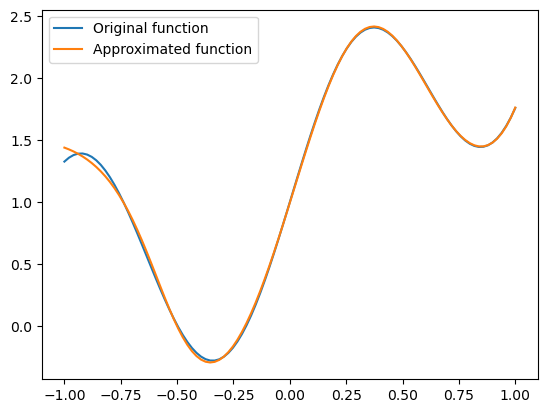

Ecuación explícita: f(x) = 2.1930 * atan(-3.6508 * x + -2.0453) + -6.4635 * atan(-1.8571 * x + 0.1619) + 5.4553 * atan(-2.0688 * x + 1.1278) + 4.6033 * atan(3.8904 * x + -5.0540) + 6.2000


In [187]:
# Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 4)  # Capa con 3 nodos
        self.fc2 = nn.Linear(4, 1)  # Capa de salida

    def forward(self, x):
        x = torch.atan(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=0.01)

# Función de cierre para el optimizador L-BFGS
def closure():
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, f_tensor)
    loss.backward()
    return loss

# Entrenar el modelo
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.step(closure)

    if (epoch+1) % 100 == 0:
        loss = closure().item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

# Extraer los pesos y sesgos del modelo
fc1_weights = model.fc1.weight.data.numpy()
fc1_biases = model.fc1.bias.data.numpy()
fc2_weights = model.fc2.weight.data.numpy()[0]
fc2_bias = model.fc2.bias.data.numpy()[0]

# Definir la ecuación explícita
def approximated_function(x):
    hidden_layer_output = np.arctan(fc1_weights @ x + fc1_biases)
    return fc2_weights @ hidden_layer_output + fc2_bias

# Evaluar la función aproximada
x_vals = np.linspace(-1, 1, 100)
approximated_vals = np.array([approximated_function(np.array([xi])) for xi in x_vals])

# Graficar los resultados
plt.plot(x, f, label='Original function')
plt.plot(x_vals, approximated_vals, label='Approximated function')
plt.xlim([-1.1, 1.1])
plt.ylim([-0.5, 2.6])
plt.legend()
plt.show()

# Imprimir la ecuación explícita
equation = "f(x) = "
for i in range(4):
    equation += f"{fc2_weights[i]:.4f} * atan({fc1_weights[i, 0]:.4f} * x + {fc1_biases[i]:.4f}) + "
equation += f"{fc2_bias:.4f}"
print("Ecuación explícita:", equation)

# Cinco neuronas

Epoch [100/1000], Loss: 0.0002
Epoch [200/1000], Loss: 0.0001
Epoch [300/1000], Loss: 0.0001
Epoch [400/1000], Loss: 0.0001
Epoch [500/1000], Loss: 0.0001
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0001
Epoch [1000/1000], Loss: 0.0001


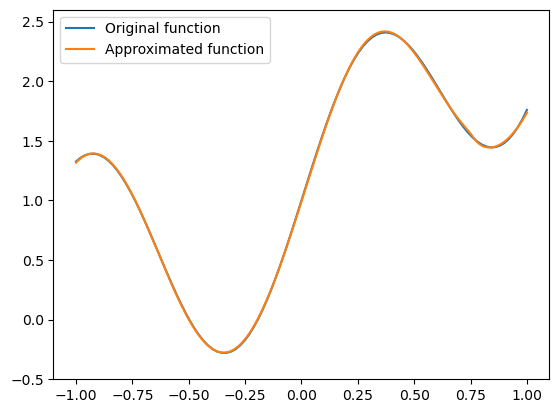

Ecuación explícita: f(x) = 0.0360 * atan(-38.2202 * x + 29.2498) + -25.9117 * atan(1.4345 * x + 0.8985) + -34.5235 * atan(-0.9677 * x + 0.3201) + -34.7587 * atan(-0.6725 * x + -0.6112) + 22.3801 * atan(-1.6601 * x + 0.8868) + -4.7047


In [205]:
# Definir el modelo
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 5)  # Capa con 3 nodos
        self.fc2 = nn.Linear(5, 1)  # Capa de salida

    def forward(self, x):
        x = torch.atan(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.LBFGS(model.parameters(), lr=0.01)

# Función de cierre para el optimizador L-BFGS
def closure():
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, f_tensor)
    loss.backward()
    return loss

# Entrenar el modelo
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.step(closure)

    if (epoch+1) % 100 == 0:
        loss = closure().item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

# Extraer los pesos y sesgos del modelo
fc1_weights = model.fc1.weight.data.numpy()
fc1_biases = model.fc1.bias.data.numpy()
fc2_weights = model.fc2.weight.data.numpy()[0]
fc2_bias = model.fc2.bias.data.numpy()[0]

# Definir la ecuación explícita
def approximated_function(x):
    hidden_layer_output = np.arctan(fc1_weights @ x + fc1_biases)
    return fc2_weights @ hidden_layer_output + fc2_bias

# Evaluar la función aproximada
x_vals = np.linspace(-1, 1, 200)
approximated_vals = np.array([approximated_function(np.array([xi])) for xi in x_vals])

# Graficar los resultados
plt.plot(x, f, label='Original function')
plt.plot(x_vals, approximated_vals, label='Approximated function')
plt.xlim([-1.1, 1.1])
plt.ylim([-0.5, 2.6])
plt.legend()
plt.show()

# Imprimir la ecuación explícita
equation = "f(x) = "
for i in range(5):
    equation += f"{fc2_weights[i]:.4f} * atan({fc1_weights[i, 0]:.4f} * x + {fc1_biases[i]:.4f}) + "
equation += f"{fc2_bias:.4f}"
print("Ecuación explícita:", equation)